In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('data/tesla_stock_data_2000_2025.csv')
df

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
...,...,...,...,...,...,...
3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [3]:
df = df.drop([0, 1])
df

,Price,Close,High,Low,Open,Volume
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
6,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
...,...,...,...,...,...,...
3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [4]:
df = df.rename(columns = {'Price': 'Date'})
df

,Date,Close,High,Low,Open,Volume
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
6,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
...,...,...,...,...,...,...
3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 2 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3692 non-null   object
 1   Close   3692 non-null   object
 2   High    3692 non-null   object
 3   Low     3692 non-null   object
 4   Open    3692 non-null   object
 5   Volume  3692 non-null   object
dtypes: object(6)
memory usage: 201.9+ KB


In [7]:
# check for non numeric values, eg. '?'
non_numeric_mask = pd.to_numeric(df['High'], errors='coerce').isnull()
non_numeric_values = df['High'][non_numeric_mask]
print(non_numeric_values)

Series([], Name: High, dtype: float64)


In [7]:
null_values = df.isnull().sum()
print(null_values)

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [5]:
df = df.astype({'Open': 'float', 'Close': 'float', 'High': 'float', 'Low': 'float', 'Volume': 'float'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 2 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3692 non-null   object 
 1   Close   3692 non-null   float64
 2   High    3692 non-null   float64
 3   Low     3692 non-null   float64
 4   Open    3692 non-null   float64
 5   Volume  3692 non-null   float64
dtypes: float64(5), object(1)
memory usage: 201.9+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 2 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3692 non-null   datetime64[ns]
 1   Close   3692 non-null   float64       
 2   High    3692 non-null   float64       
 3   Low     3692 non-null   float64       
 4   Open    3692 non-null   float64       
 5   Volume  3692 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 201.9 KB


In [12]:
df.describe()

,Close,High,Low,Open,Volume
count,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03
mean,84.684063,86.583019,82.720395,84.724803,9.647972e+07
std,111.289879,113.897252,108.647448,111.413059,7.736170e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.226501,12.447833,12.011500,12.238833,4.938900e+07
50%,18.326334,18.641334,17.938334,18.325000,8.192955e+07
75%,182.869999,186.305000,178.772499,182.982506,1.216402e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


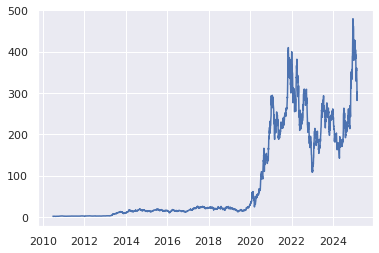

In [13]:
x = df['Date']
y = df['Close']
plt.plot(x, y)
plt.show()

In [14]:
corr = df.corr()
corr

,Close,High,Low,Open,Volume
Close,1.000000,0.999643,0.999690,0.999214,0.083805
High,0.999643,1.000000,0.999638,0.999721,0.086383
Low,0.999690,0.999638,1.000000,0.999624,0.079746
Open,0.999214,0.999721,0.999624,1.000000,0.082815
Volume,0.083805,0.086383,0.079746,0.082815,1.000000


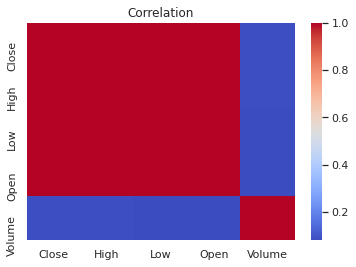

In [15]:
# from correlation you can see that volume and close price is not so correlated with low value
# so it does not need to be considered
# and close is highly correlated with other 3 features
# other 3 features themselves has high correlation with each other which indicates multicolinearity > 0.7
# so use mixed selection and find best estimator
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation')
plt.show()

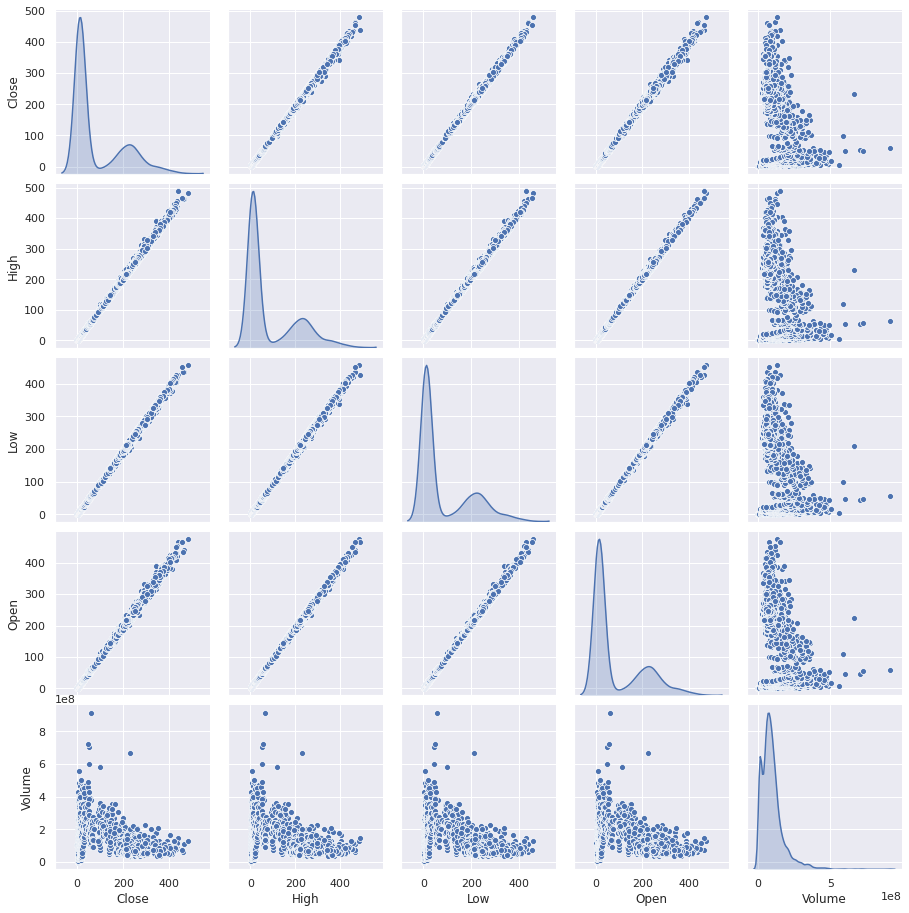

In [16]:
sns.pairplot(df, diag_kind='kde')
plt.show()
# this indicates colinearity

In [17]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [18]:
# ------------------------------------------------Polynomial regression-----------------------------------------------------

In [19]:
column_names = df.columns.difference(['Date', 'Close'])

for i in column_names:
    print(i)
    model = smf.ols(formula = f"Close ~ {i}", data = X_train)
    res = model.fit()
    print(res.summary())
    print('')
    print('')

High
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.067e+06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:09:03   Log-Likelihood:                -7445.9
No. Observations:                2953   AIC:                         1.490e+04
Df Residuals:                    2951   BIC:                         1.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1238      0.070      1.768    

In [20]:
r_score = []

formula = 'Close ~ High'
model=smf.ols(formula, data=X_train).fit()
r_score.append(model.rsquared)

for i in range(1, 21):
    formula += f' + np.power(Close, {i})'
    model=smf.ols(formula, data=df).fit()
    r_score.append(model.rsquared)
print(r_score)

[0.9992749215208954, 1.0, 1.0, 1.0, 1.0, 0.9999999999999141, 0.9999999029800662, 0.9870964773252358, 0.9800143730386152, 0.9694282129046518, 0.9508383632154832, 0.9205773261910659, 0.8768402162865236, 0.820215040967603, 0.7526705242689585, 0.6763412725373977, 0.593217170851625, 0.5055596531416975, 0.4164363519323928, 0.3297462479362696, -0.010737935888747607]


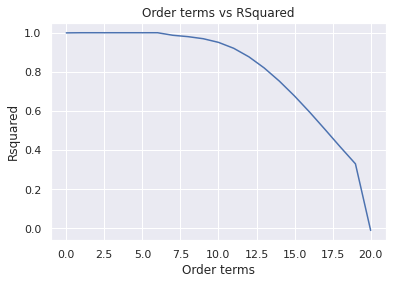

In [21]:
plt.plot(r_score)
plt.xlabel('Order terms')
plt.ylabel('Rsquared')
plt.title('Order terms vs RSquared')
plt.show()

# best rsquared: 1.0
# sound degree: 2

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.011
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    -13.06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               1.00
Time:                        14:09:14   Log-Likelihood:                -22655.
No. Observations:                3692   AIC:                         4.532e+04
Df Residuals:                    3688   BIC:                         4.534e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.299e-80   4.75e-82     27.360      0.000    1.21e-80    1.39e-80
High                 1.213e-44   4.43e-46     27.360      0.000    1.13e-44     1.3e-44
np.power(Close, 1)  -5.784e-49   2.11e-50    -27.360      0.000    -6.2e-49   -5.37e-49
np.power(Close, 2)   -1.84e-52   6.73e-54    -27.360      0.000   -1.97e-52   -1.71e-52
np.power(Close, 3)  -2.249e-55   8.22e-57    -27.360      0.000   -2.41e-55   -2.09e-55
np.power(Close, 4)   4.682e-70   1.71e-71     27.360      0.000    4.35e-70    5.02e-70
np.power(Close, 5)   4.192e-68   1.53e-69     27.360      0.000    3.89e-68    4.49e-68
np.power(Close, 6)   1.323e-65   4.83e-67     27.360      0.000    1.23e-65    1.42e-65
np.power(Close, 7)   4.135e-63   1.51e-64     27.360      0.000    3.84e-63    4.43e-63
np.power(Close, 8)   1.275e-60   4.66e-62     27.360      0.000    1.18e-60    1.37e-60
np.power(Close, 9)   3.863e-58   1.41e-59     27.360      0.000    3.59e-58    4.14e-58
np.power(Close, 10)  1.142e-55   4.17e-57     27.360      0.000    1.06e-55    1.22e-55
np.power(Close, 11)   3.27e-53    1.2e-54     27.360      0.000    3.04e-53     3.5e-53
np.power(Close, 12)  8.966e-51   3.28e-52     27.360      0.000    8.32e-51    9.61e-51
np.power(Close, 13)  2.317e-48   8.47e-50     27.360      0.000    2.15e-48    2.48e-48
np.power(Close, 14)  5.501e-46   2.01e-47     27.360      0.000    5.11e-46    5.89e-46
np.power(Close, 15)  1.148e-43    4.2e-45     27.360      0.000    1.07e-43    1.23e-43
np.power(Close, 16)  1.925e-41   7.04e-43     27.360      0.000    1.79e-41    2.06e-41
np.power(Close, 17)  2.025e-39    7.4e-41     27.360      0.000    1.88e-39    2.17e-39
np.power(Close, 18) -1.351e-41   5.09e-43    -26.516      0.000   -1.45e-41   -1.25e-41
np.power(Close, 19)      3e-44   1.17e-45     25.740      0.000    2.77e-44    3.23e-44
np.power(Close, 20)  -2.22e-47   8.87e-49    -25.023      0.000   -2.39e-47   -2.05e-47
==============================================================================
Omnibus:                      326.493   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.718
Skew:                           0.813   Prob(JB):                     1.45e-90
Kurtosis:                       2.790   Cond. No.                     8.65e+56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+56. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

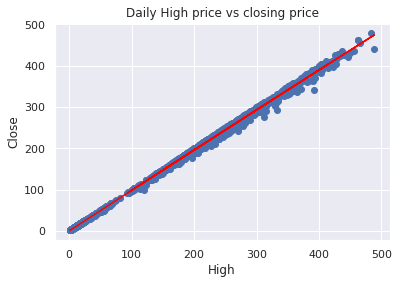

In [32]:
# add a regression plot here
X = df['High']
Y = df['Close']

plt.scatter(X, Y) 

# Calculate regression line
m, b, c = np.polyfit(X, Y, 2)  

# Plot regression line
plt.plot(X, m*X**2 + b*X + c, color='red') 

plt.xlabel('High')
plt.ylabel('Close')
plt.title('Daily High price vs closing price')
plt.show()

In [24]:
#---------------------------------------------- Multi linear regression----------------------------------------------------

In [34]:
mod = smf.ols(formula = 'Close ~ Open', data = X_train)
res = mod.fit()
print(res.summary())
#close to 0 p value

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.875e+06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:33:35   Log-Likelihood:                -8588.0
No. Observations:                2953   AIC:                         1.718e+04
Df Residuals:                    2951   BIC:                         1.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1254      0.103      1.217      0.2

In [35]:
mod = smf.ols(formula = 'Close ~ Open + High', data = X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.159e+06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:33:39   Log-Likelihood:                -7356.9
No. Observations:                2953   AIC:                         1.472e+04
Df Residuals:                    2950   BIC:                         1.474e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1401      0.068      2.062      0.0

In [36]:
mod = smf.ols(formula = 'Close ~ Open + High + Low', data = X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.426e+06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:33:42   Log-Likelihood:                -6076.7
No. Observations:                2953   AIC:                         1.216e+04
Df Residuals:                    2949   BIC:                         1.219e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0251      0.044      0.569      0.5

In [38]:
res.predict(X_test)

395       1.836975
3561    223.363290
553       1.919041
1297     16.408993
820      12.682889
           ...    
2036     19.878934
2887    321.094251
2010     23.924025
1616     12.929988
3557    201.158654
Length: 739, dtype: float64